#  CRIMES  IN  BOSTON

# Table of contents


 INTRODUCTION

#  Introduction

Crime rates vary from place to place depending on many factors. Crimes include but not limit to murders, rapes, robberies, assaults, burglaries, thefts, auto thefts, arson, law enforcement employees, police officers and so on. They can be categorized into two types e.g., violent crimes and property crime. A violent crime is a crime in which an offender or perpetrator uses or threatens to use force upon a victim. This entails both crimes in which the violent act is the objective, such as murder or rape, as well as crimes in which violence is the means to an end (Wikipedia). Property crime, on the other hand, is a crime that includes, among other crimes, burglary, larceny, theft, motor vehicle theft, arson, shoplifting, and vandalism. Property crime is a crime to obtain money, property, or some other benefit. This may involve force, or the threat of force, in cases like robbery or extortion (Wikipedia). The crime cost per annual in the United Of America have been estimated from \$690 billion up to \\$3.41 trillion [1]. Understanding the crimes' nature and roots is very crucial for individual, society, and nation as a whole. First of all, it can help individual better prepare themselves not to become the victim. It can also help society to take action to minimize crime rate for the safety and wealth of the community. Moreover, reducing crime rate can help a country minimizing its expense on social safety and increasing the harmony of the people.
In this study, I aim at integrating the crime data in Boston with the Fourquare map data to identify the relatioship between crime types and districts that crimes happened with the venues in the Foursquare. The relationship can reveal what kind of crimes more often happen in a specific area of Boston city.

# Dataset 

Thee datasets are used in this study including i) list of United States cities by crime rate [2], ii) US crime incident report [3], and iii) Foursquare [4]. In this section, we shall explore the data by using visualization techniques to get a quick understanding of the data at hand.
In US crime incident dataset, we select only three features from the whole dataset. They are including city, total violent crime, and total property crime. These three feature can tell us which city is safer comparing to the others. In the Boston crime dataset which is our main objective of the project, we select some features such as OFFENSE_CODE_GROUP, District, Latitude, and Longitude to integrate with Foursquare dataset to work on map later.
Whenever we make a call to Foursquare database, we get a list of name, unique ID, location, and category which can be integrate with crime data that also contain the location. Hence, utilizing these two datasets can help us identify the relaship between crimes and venues.

# Method 

In this analysis, two main methods including visualization and clustering are adopted. Visualization is an effective method to explore data before we apply any data mining or machine learning methods. It also gives us a quick understanding of our data so that we can investigate the interesting problems later.
Moreover, clustering methods aim at grouping the data based on their characteristics. In our problem, clusterig method can be used to cluster the neighborhoods of the districts in Boston from our crime data based on their venues that obtained from Foursquare. Crime data also contain different features which are types and numbers of crimes that happened in those districts.

# Below we illustrate the data exploration

In [2]:
# Importing some libraries to work on

import numpy as np
# import k-means from clustering stage
from sklearn.cluster import KMeans
import requests # library to handle requests
#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import pandas as pd
from matplotlib.pyplot import figure
import seaborn as sns
from scipy.stats import powerlaw

In [3]:
#!pip install powerlaw


In [4]:
# Reading the first dataset
# URL of the data to be read from wiki
url_data = 'https://en.wikipedia.org/wiki/List_of_United_States_cities_by_crime_rate'

The following table of United States cities by crime rate is based on Federal Bureau of Investigation Uniform Crime Reports statistics from 2017 for the top 100 most populous cities in America that have reported data to the FBI UCR system

In [5]:
# Using pandas to read html
df_wiki = pd.read_html(url_data, header =0, flavor = 'bs4')

# Capture only the table data
df = df_wiki[0]
df.shape

(101, 13)

In [6]:
df.head()

,State,City,Population,Violent crime,Violent crime.1,Violent crime.2,Violent crime.3,Violent crime.4,Property crime,Property crime.1,Property crime.2,Property crime.3,Arson2
0,State,City,Population,Total,Murder and Nonnegligent manslaughter,Rape1,Robbery,Aggravated assault,Total,Burglary,Larceny-theft,Motor vehicle theft,Arson2
1,Alabama,Mobile3,248431,740.25,20.13,57.16,177.11,485.85,5453.83,1216.84,3730.21,506.78,22.94
2,Alaska,Anchorage,296188,1203.29,9.12,132.01,262.67,799.49,5415.82,748.17,3619.66,1047.98,20.93
3,Arizona,Chandler,249355,259.47,2.01,52.13,56.95,148.38,2329.61,314.41,1866.01,149.18,NaN
4,Arizona,Gilbert,242090,85.51,2.07,16.11,21.07,46.26,1385.85,192.49,1137.59,55.76,12.39


In [7]:
new_header = df.iloc[0] #grab the first row for the header
df = df[1:] #take the data less the header row
df.columns = new_header #set the header row as the df header

In [8]:
df.head()

,State,City,Population,Total,Murder and Nonnegligent manslaughter,Rape1,Robbery,Aggravated assault,Total,Burglary,Larceny-theft,Motor vehicle theft,Arson2
1,Alabama,Mobile3,248431,740.25,20.13,57.16,177.11,485.85,5453.83,1216.84,3730.21,506.78,22.94
2,Alaska,Anchorage,296188,1203.29,9.12,132.01,262.67,799.49,5415.82,748.17,3619.66,1047.98,20.93
3,Arizona,Chandler,249355,259.47,2.01,52.13,56.95,148.38,2329.61,314.41,1866.01,149.18,NaN
4,Arizona,Gilbert,242090,85.51,2.07,16.11,21.07,46.26,1385.85,192.49,1137.59,55.76,12.39
5,Arizona,Glendale,249273,488.22,4.81,38.91,192.96,251.53,4530.37,637.45,3426.36,466.56,19.26


In [9]:
df.columns.values[3] = "Violent"
df.columns.values[8] = "Property"
df.head()

,State,City,Population,Violent,Murder and Nonnegligent manslaughter,Rape1,Robbery,Aggravated assault,Property,Burglary,Larceny-theft,Motor vehicle theft,Arson2
1,Alabama,Mobile3,248431,740.25,20.13,57.16,177.11,485.85,5453.83,1216.84,3730.21,506.78,22.94
2,Alaska,Anchorage,296188,1203.29,9.12,132.01,262.67,799.49,5415.82,748.17,3619.66,1047.98,20.93
3,Arizona,Chandler,249355,259.47,2.01,52.13,56.95,148.38,2329.61,314.41,1866.01,149.18,NaN
4,Arizona,Gilbert,242090,85.51,2.07,16.11,21.07,46.26,1385.85,192.49,1137.59,55.76,12.39
5,Arizona,Glendale,249273,488.22,4.81,38.91,192.96,251.53,4530.37,637.45,3426.36,466.56,19.26


In [10]:
df_city_crime = df[['City','Violent','Property']]
# Drop NaN records
df_city_crime = df_city_crime.dropna() 
df_city_crime.shape

(96, 3)

In [11]:
df_city_crime.head()

,City,Violent,Property
1,Mobile3,740.25,5453.83
2,Anchorage,1203.29,5415.82
3,Chandler,259.47,2329.61
4,Gilbert,85.51,1385.85
5,Glendale,488.22,4530.37


# Using visualization to explore the dataset

Plotting violent crime rate by city

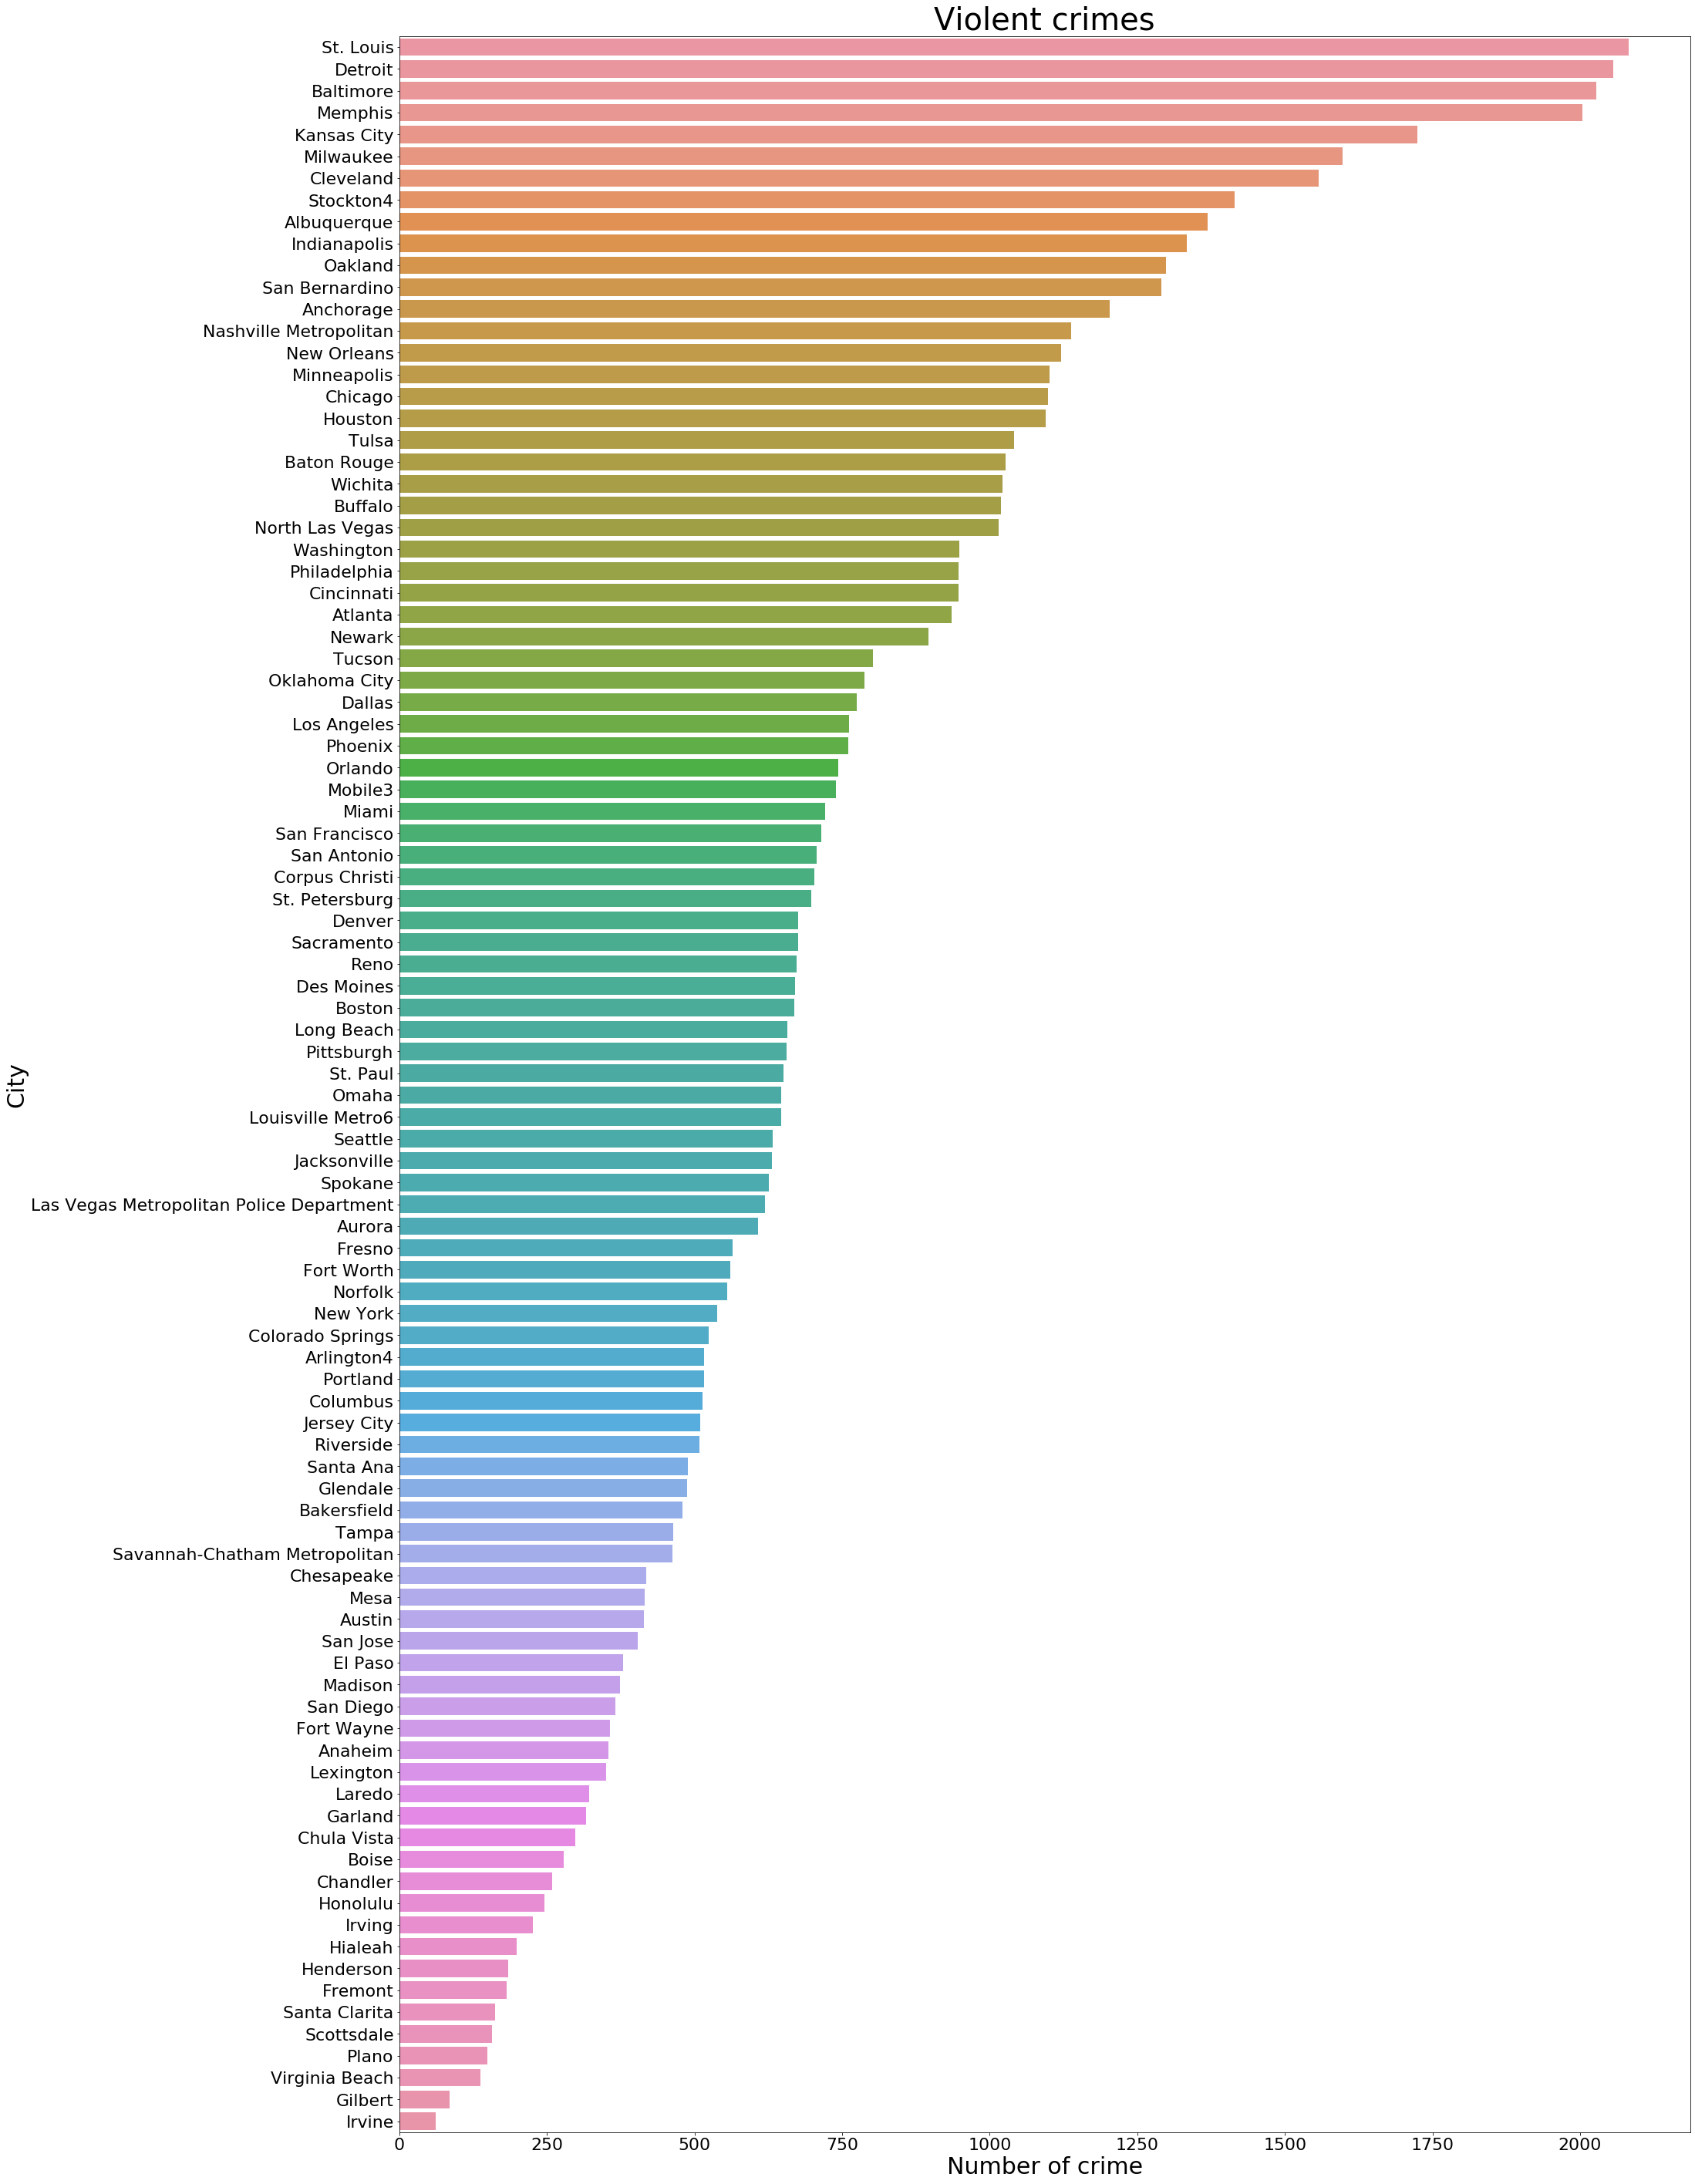

In [12]:
df_city_crime["Violent"] = pd.to_numeric(df_city_crime["Violent"])
df_city_crime = df_city_crime.sort_values("Violent", ascending=False)

f, ax = plt.subplots(figsize=(30, 50))
bar = sns.barplot(x="Violent", y="City", data=df_city_crime)
bar.axes.set_title("Violent crimes",fontsize=40)
bar.set_ylabel("City",fontsize=30)
bar.set_xlabel("Number of crime",fontsize=30)
bar.tick_params(labelsize=22)

Plotting propert crime rate

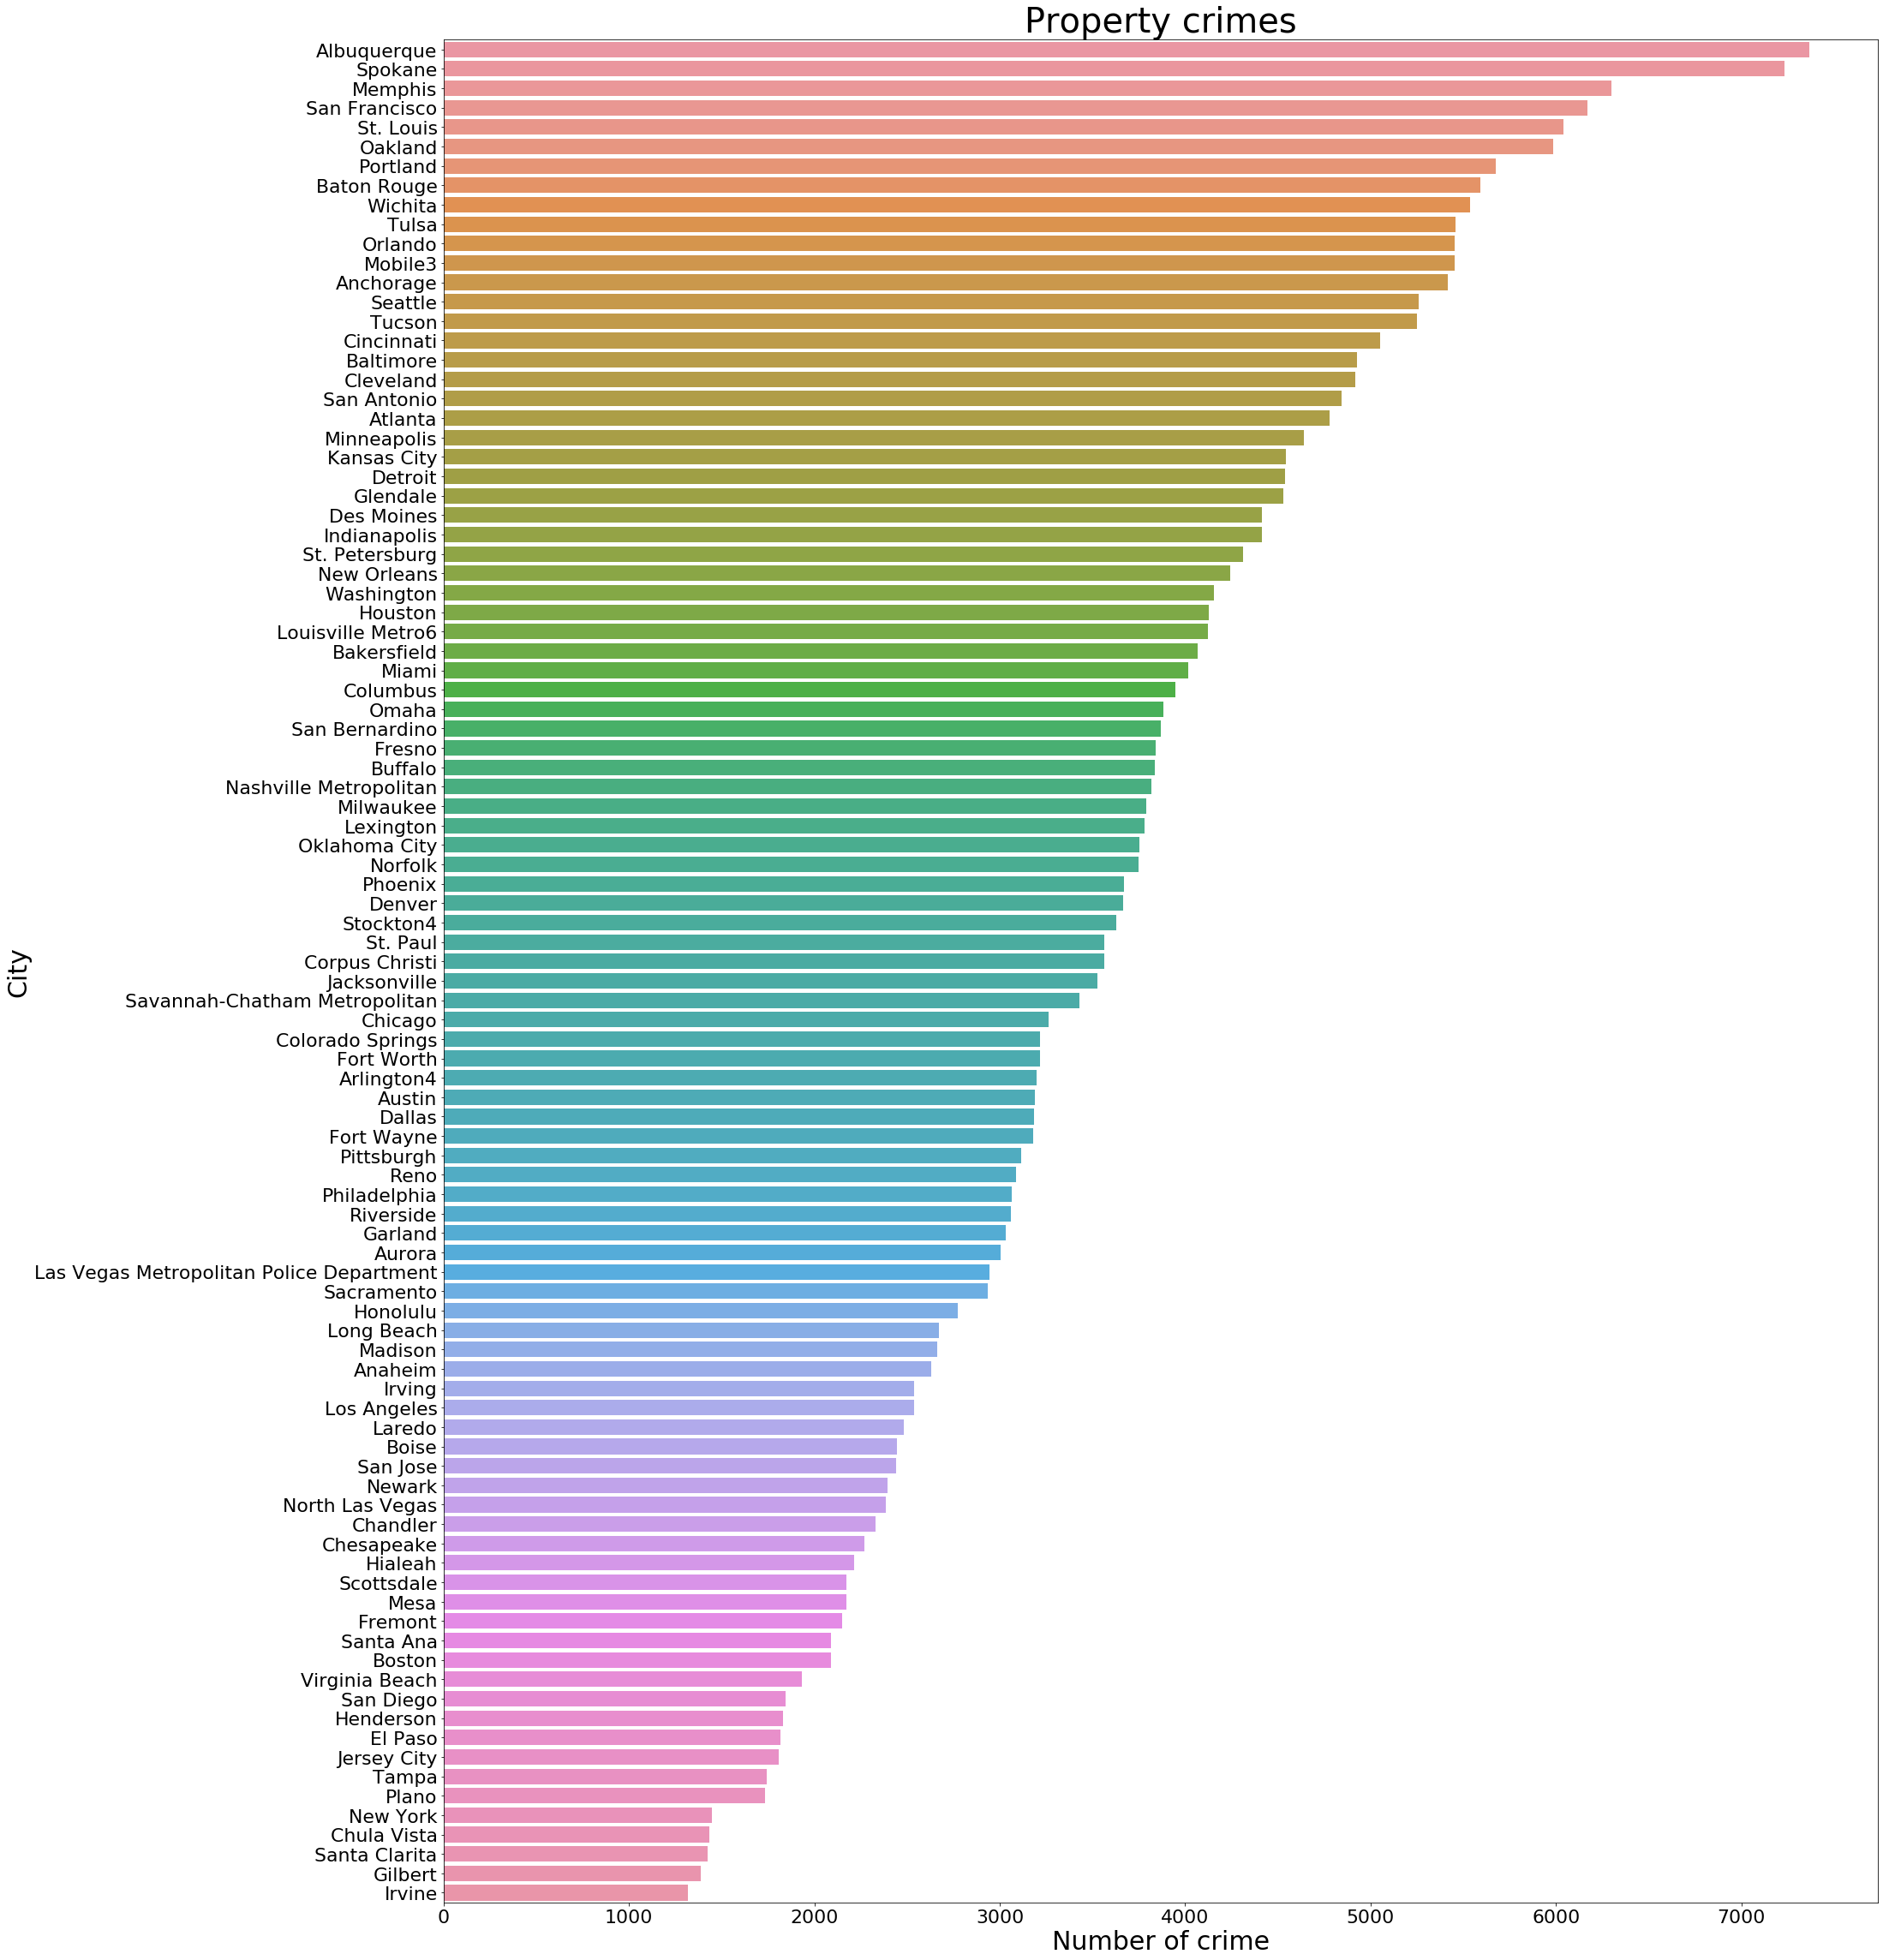

In [13]:
df_city_crime["Property"] = pd.to_numeric(df_city_crime["Property"])
df_city_crime = df_city_crime.sort_values("Property", ascending=False)

f, ax = plt.subplots(figsize=(30, 40))
bar = sns.barplot(x="Property", y="City", data=df_city_crime)
bar.axes.set_title("Property crimes",fontsize=40)
bar.set_ylabel("City",fontsize=30)
bar.set_xlabel("Number of crime",fontsize=30)
bar.tick_params(labelsize=22)

# Exploring Boston crime dataset

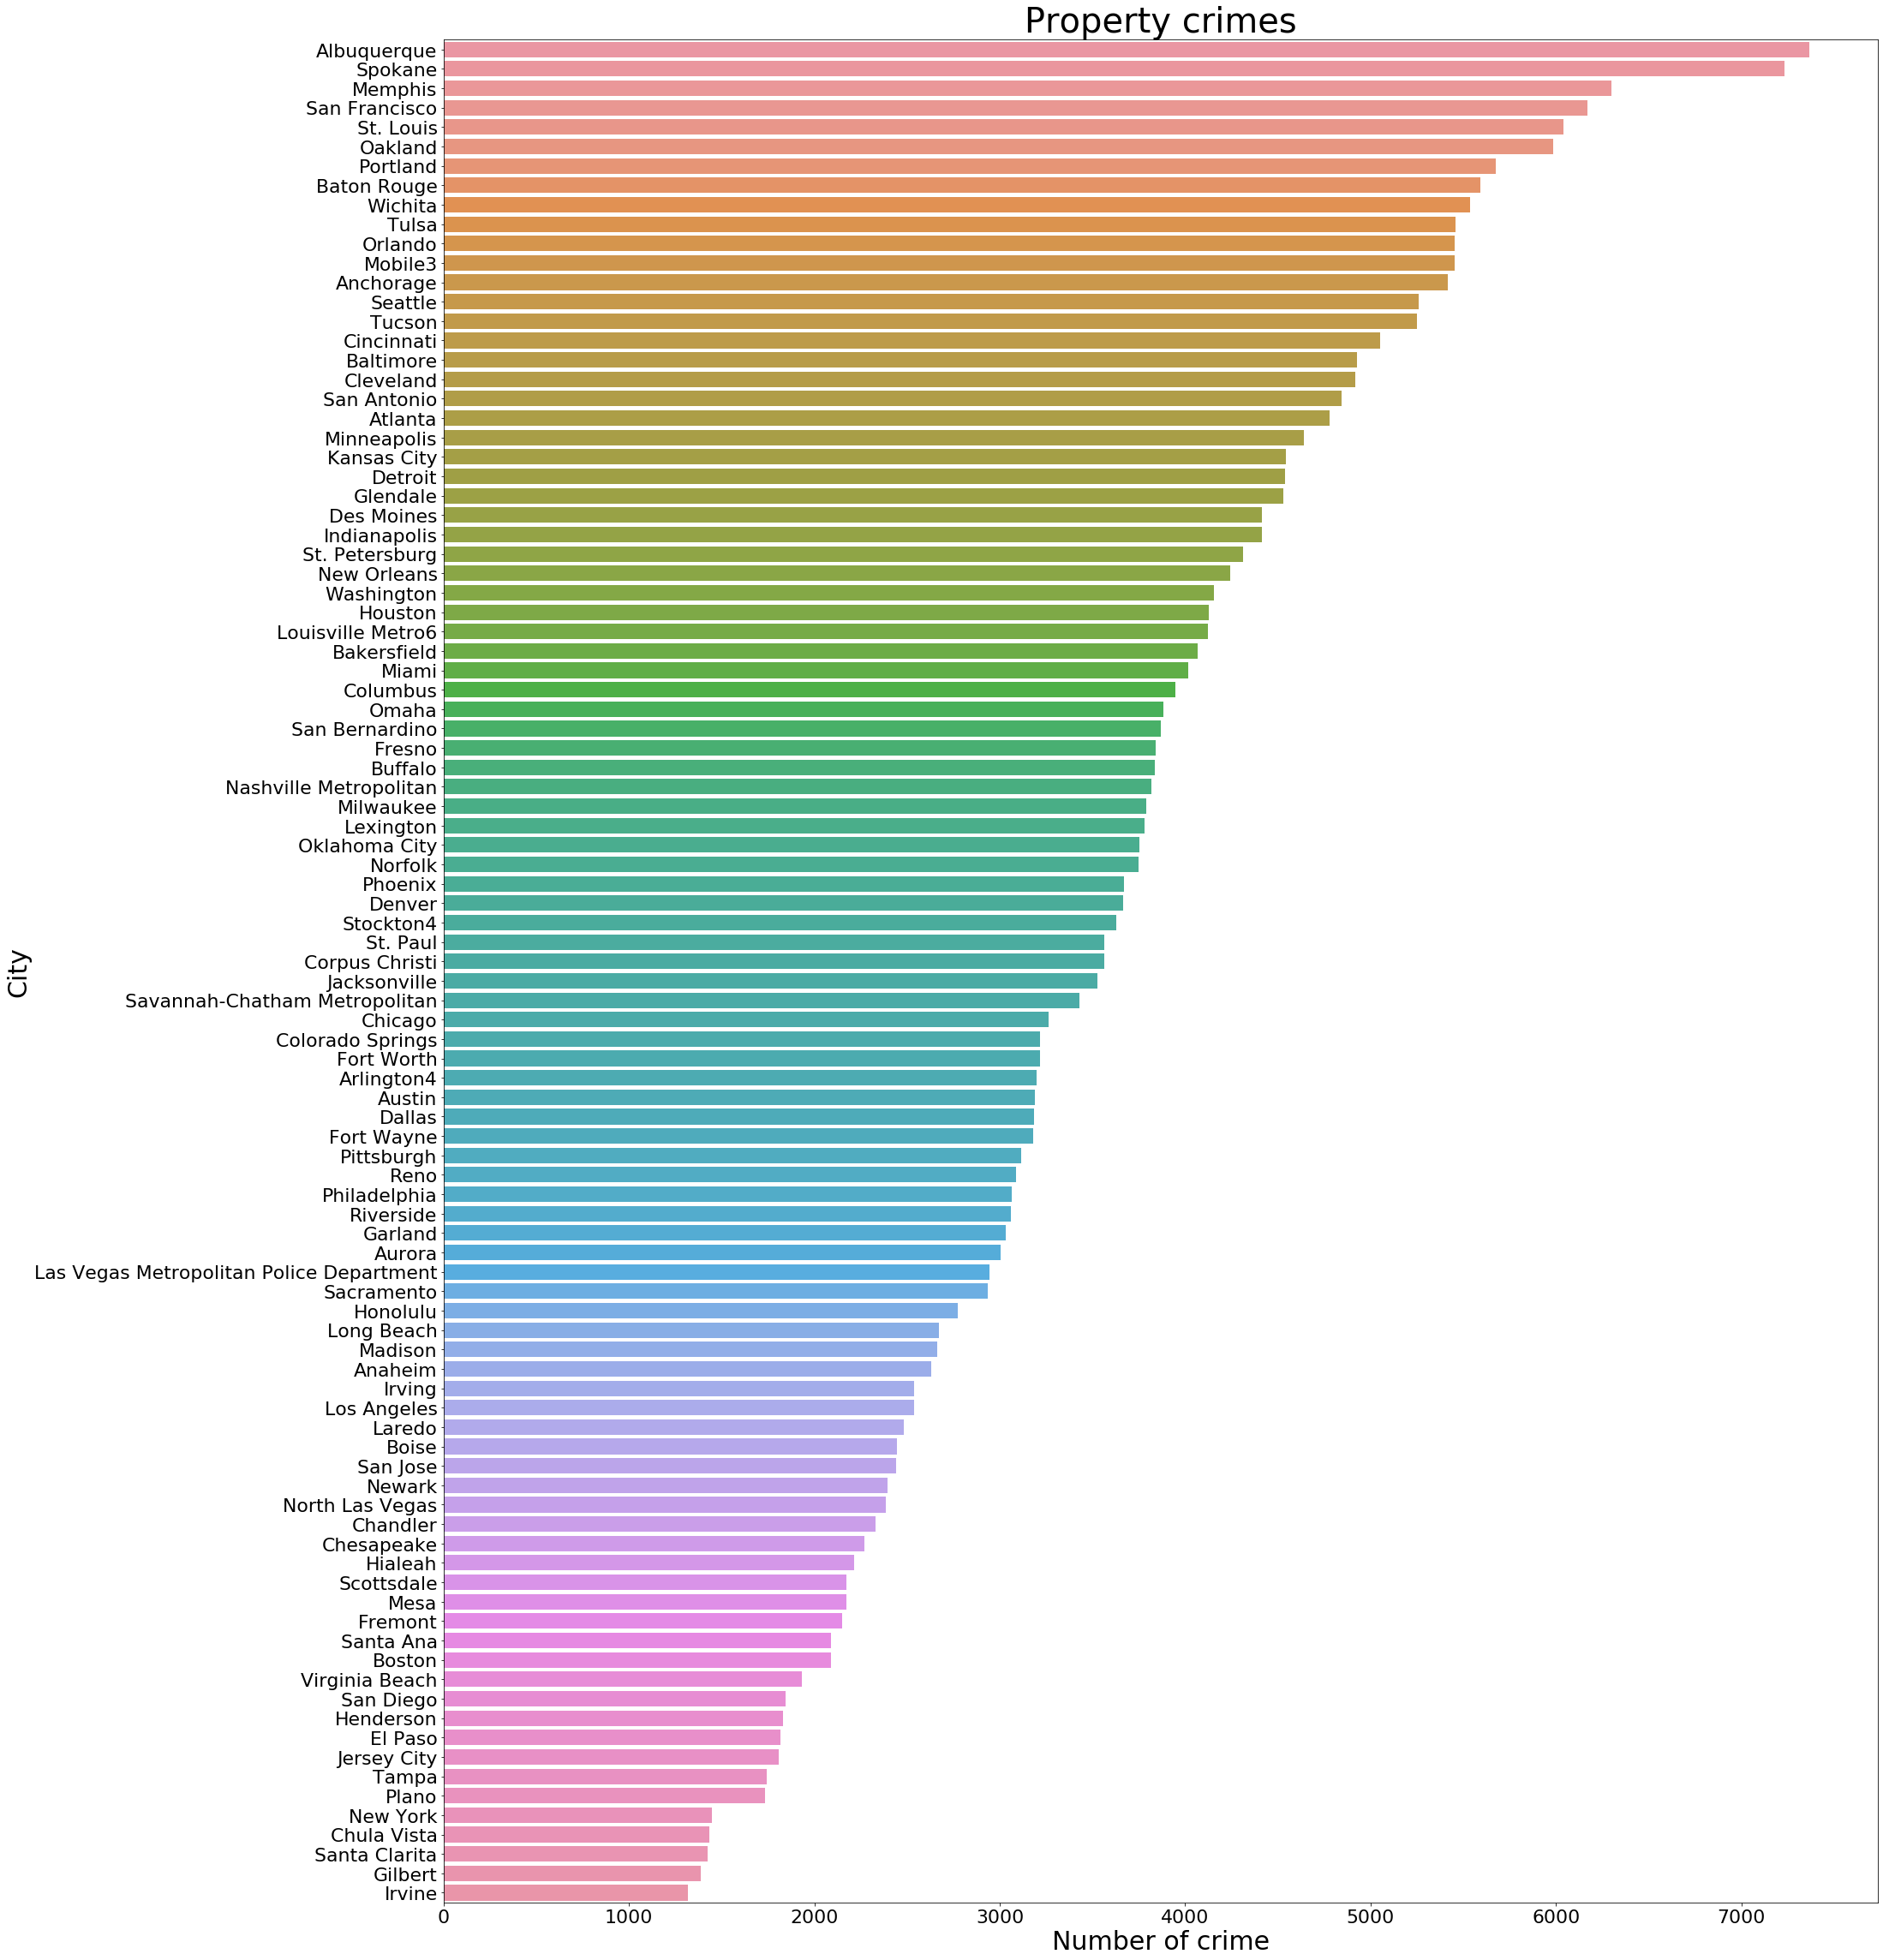

In [22]:
df_city_crime["Property"] = pd.to_numeric(df_city_crime["Property"])
df_city_crime = df_city_crime.sort_values("Property", ascending=False)

f, ax = plt.subplots(figsize=(30, 40))
bar = sns.barplot(x="Property", y="City", data=df_city_crime)
bar.axes.set_title("Property crimes",fontsize=40)
bar.set_ylabel("City",fontsize=30)
bar.set_xlabel("Number of crime",fontsize=30)
bar.tick_params(labelsize=22)